# Churning Prediction model using classification

## Importing all the libraries 


In [2]:
#import of libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report


## Loading the dataset

In [3]:
# load the churning dateset
churn_df = pd.read_csv('../data/BankChurners.csv')

## Data Cleaning

In [4]:
# dimension of the dataset
churn_df.shape

(10127, 23)

In [5]:
# Details of the dataset
display(churn_df.head())

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

In [6]:
# checking for null values
print(churn_df.isnull().sum())

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [7]:
# Deleting the last two columns of churn_df
churn_df = churn_df.iloc[:, :-2]
churn_df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

In [8]:
churn_df.shape

(10127, 21)

In [9]:
# Checking for the null value
churn_df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [10]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [11]:
pd.set_option('display.max_columns', None)
churn_df

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0                  39                         5                       1   
1                  44                         6                       1   
2                  36                         4                       1   
3                  34                         3                       4   
4                  21                         5                       1   
...               ...                       ...                     ...   
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...     

In [12]:
## list of column names with unique categorical values
{column: list(churn_df[column].unique()) for column in churn_df.select_dtypes('object').columns} 

{'Attrition_Flag': ['Existing Customer', 'Attrited Customer'],
 'Gender': ['M', 'F'],
 'Education_Level': ['High School',
  'Graduate',
  'Uneducated',
  'Unknown',
  'College',
  'Post-Graduate',
  'Doctorate'],
 'Marital_Status': ['Married', 'Single', 'Unknown', 'Divorced'],
 'Income_Category': ['$60K - $80K',
  'Less than $40K',
  '$80K - $120K',
  '$40K - $60K',
  '$120K +',
  'Unknown'],
 'Card_Category': ['Blue', 'Gold', 'Silver', 'Platinum']}

In [13]:
## Replacing the unknown values in Education_Level and Income_Category
columns = ['Education_Level', 'Income_Category']
churn_df[columns] = churn_df[columns].replace('Unknown', np.NaN)

In [14]:
{column: list(churn_df[column].unique()) for column in churn_df.select_dtypes('object').columns}

{'Attrition_Flag': ['Existing Customer', 'Attrited Customer'],
 'Gender': ['M', 'F'],
 'Education_Level': ['High School',
  'Graduate',
  'Uneducated',
  nan,
  'College',
  'Post-Graduate',
  'Doctorate'],
 'Marital_Status': ['Married', 'Single', 'Unknown', 'Divorced'],
 'Income_Category': ['$60K - $80K',
  'Less than $40K',
  '$80K - $120K',
  '$40K - $60K',
  '$120K +',
  nan],
 'Card_Category': ['Blue', 'Gold', 'Silver', 'Platinum']}

In [15]:
churn_df.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status                 0
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [16]:
# To check for duplicates
duplicates = churn_df[churn_df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [CLIENTNUM, Attrition_Flag, Customer_Age, Gender, Dependent_count, Education_Level, Marital_Status, Income_Category, Card_Category, Months_on_book, Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio]
Index: []


In [17]:
# Dropping the CLIENTNUM column
churn_df = churn_df.drop('CLIENTNUM', axis=1)

In [18]:
churn_df

Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      Existing Customer            45      M                3   
1      Existing Customer            49      F                5   
2      Existing Customer            51      M                3   
3      Existing Customer            40      F                4   
4      Existing Customer            40      M                3   
...                  ...           ...    ...              ...   
10122  Existing Customer            50      M                2   
10123  Attrited Customer            41      M                2   
10124  Attrited Customer            44      F                1   
10125  Attrited Customer            30      M                2   
10126  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123             NaN       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0                  39                         5                       1   
1                  44                         6                       1   
2                  36                         4                       1   
3                  34                         3                       4   
4                  21                         5                       1   
...               ...                       ...                     ...   
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0

## Creating a pipeline for the model training and testing

In [19]:
# dividing the columns into features and targets
X = churn_df.drop(columns='Attrition_Flag').to_numpy()
y = churn_df.Attrition_Flag.to_numpy().reshape(-1,1)
print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)




Shape of X:  (10127, 19)
Shape of y:  (10127, 1)


In [20]:
# Splitting into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Printing shape of different train and test sets
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (8101, 19)
Shape of y_train:  (8101, 1)
Shape of X_test:  (2026, 19)
Shape of y_test:  (2026, 1)


In [21]:
np.set_printoptions(threshold=np.inf)
print(X_train)

[[54 'F' 1 nan 'Single' nan 'Blue' 36 1 3 3 3723.0 1728 1995.0 0.595 8554
  99 0.678 0.464]
 [58 'F' 4 'High School' 'Married' nan 'Blue' 48 1 4 3 5396.0 1803 3593.0
  0.493 2107 39 0.393 0.334]
 [45 'F' 4 nan 'Single' 'Less than $40K' 'Gold' 36 6 1 3 15987.0 1648
  14339.0 0.732 1436 36 1.25 0.103]
 [34 'F' 2 'Graduate' 'Single' 'Less than $40K' 'Blue' 36 4 3 4 3625.0
  2517 1108.0 1.158 2616 46 1.3 0.694]
 [49 'F' 2 'High School' 'Married' '$40K - $60K' 'Blue' 39 5 3 4 2720.0
  1926 794.0 0.602 3806 61 0.794 0.708]
 [60 'F' 0 'Doctorate' 'Married' 'Less than $40K' 'Blue' 45 5 2 4 1438.3
  648 790.3 0.477 1267 27 1.077 0.451]
 [43 'F' 4 nan 'Single' nan 'Blue' 28 2 2 1 2838.0 1934 904.0 0.873 8644
  87 0.554 0.681]
 [52 'F' 2 nan 'Single' '$40K - $60K' 'Blue' 45 3 1 3 3476.0 1560 1916.0
  0.894 3496 58 0.871 0.449]
 [30 'M' 0 'Graduate' 'Married' 'Less than $40K' 'Blue' 36 3 3 2 2550.0
  1623 927.0 0.65 1870 51 0.275 0.636]
 [33 'F' 3 'Graduate' 'Single' 'Less than $40K' 'Blue' 36 5 2

In [22]:
# first transformation for the pipeline which is Simple Imputer
trans1 = ColumnTransformer([('Simple_Imputer', SimpleImputer(strategy='most_frequent'), [3, 5])], remainder='passthrough')


In [23]:
# Second transformation for the pipeline which is OneHotEncoder
trans2 = ColumnTransformer([('One_Hot_Encoder', OneHotEncoder(sparse_output=False ,handle_unknown='ignore', drop='first'), [0,1,3,4,5,6])], remainder='passthrough')


In [24]:
# Third transformation for the pipeline which is Scaling using Standard Scaler
trans3 = ColumnTransformer([('Scaling', StandardScaler(), slice(0,36))], remainder='passthrough')

In [25]:
# Lastly the classification model, creating an instance of RandomforestClassifier
model_classifier = RandomForestClassifier(max_depth=10, max_features=7,random_state=42)

In [26]:
# Creating a pipeline for above steps
pipe = Pipeline([
    ('trans1', trans1),
    ('trans2', trans2),
    ('trans3', trans3),
    ('classifier', model_classifier)
])

In [27]:
# Training the model using the above pipeline
pipe.fit(X_train, y_train)

/Users/mac/Documents/GitHub/Churn_Prediction_Project/.venv/lib/python3.9/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('trans1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Simple_Imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [3, 5])])),
                ('trans2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One_Hot_Encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [0, 1, 3, 4, 5, 6])])),
                ('trans3',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Scaling', StandardScaler(),
                                                  slice(0, 36, None))])),
                ('classifier',
                 RandomForestClassifier(max_depth=10, max_features=7,
                                        random_state=42))])

In [28]:
# printing the score of the trained model
pipe.score(X_train, y_train)

0.9844463646463399

In [29]:
# predicting the test data
y_pred = pipe.predict(X_test)



In [30]:
pipe.score(X_test, y_test)

0.9506416584402764

In [35]:
# Printing confusion matrix for the prediction done on test set 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 244,   83],
       [  17, 1682]])

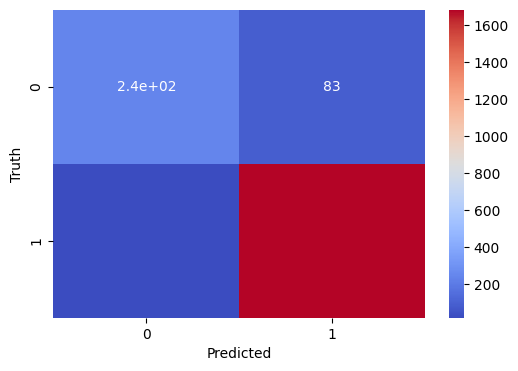

In [39]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [33]:
# Printing the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                   precision    recall  f1-score   support

Attrited Customer       0.93      0.75      0.83       327
Existing Customer       0.95      0.99      0.97      1699

         accuracy                           0.95      2026
        macro avg       0.94      0.87      0.90      2026
     weighted avg       0.95      0.95      0.95      2026

